# Лабороторная работа №2

## 1.1 Запуск Graph500 и определение характеристик теста

Для запуска теста Graph500 я выбрал Octave/Matlab реализацию и запустил ее на машине со следующими параметрами:
- ОС: Oracle Linux Server 6.7 64-bit
- RAM: 10Gb
- CPUs: 4-Core, Intel Core I5-4570 CPU 3.20GHz
- Octave: version 3.4.3

#### Результаты initial запуска:

- SCALE: 12
- edgefactor: 16
- NBFS: 64
- construction_time: 3.07269096374511719e-02
- min_time: 7.78958797454833984e-02
- firstquartile_time: 7.89991021156311035e-02
- median_time: 7.99659490585327148e-02
- thirdquartile_time: 8.23409557342529297e-02
- max_time: 9.69669818878173828e-02
- mean_time: 8.15475359559059143e-02
- stddev_time: 3.96532038356381747e-03
- min_nedge: 5.03105000000000000e+04
- firstquartile_nedge: 5.03105000000000000e+04
- median_nedge: 5.03105000000000000e+04
- thirdquartile_nedge: 5.03105000000000000e+04
- max_nedge: 5.03105000000000000e+04
- mean_nedge: 5.03105000000000000e+04
- stddev_nedge: 0.00000000000000000e+00
- min_TEPS: 5.18841558441047557e+05
- firstquartile_TEPS: 6.11011350890197442e+05
- median_TEPS: 6.29149078897213214e+05
- thirdquartile_TEPS: 6.36849014656021609e+05
- max_TEPS: 6.45868564093303401e+05
- harmonic_mean_TEPS: 6.16946906000982272e+05
- harmonic_stddev_TEPS: 3.77959229899608772e+03


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.image as mpimg

#### Матрица смежности


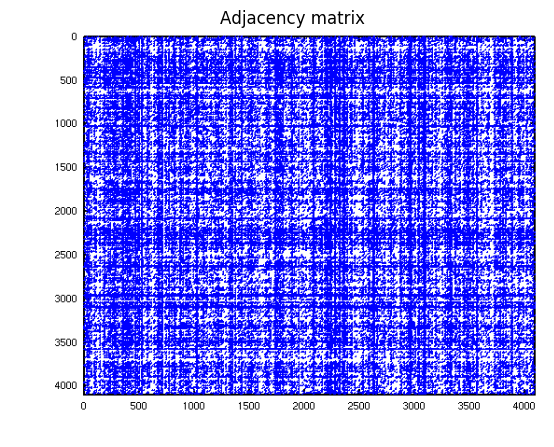

In [25]:
img=mpimg.imread('Graphics\adjacencymatrix.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('Adjacency matrix')
plt.show()

При вышеуказанных параметрах производительность колебалась от 0,51 MTEPS до 0,65 MTEPS, что не позволяет претендовать даже на последнее место в списке результатов июля 2015 года, поскольку минимальный результат составлял 0,02 GTEPS  (192 место) при куда более высоком параметре SCALE.

Максимально возможный параметр SCALE, при котором мне удалось запустить тест был равен 25. В случае SCALE > 25 граф G с 2^SCALE кол-вом вершин не мог быть создан, поскольку число ребер выходило за рамки индескирования Octave.

## 1.2 Определение параметров графа Кронекера

Для генерации 1000 графов с параметром SCALE=16 был написан скрипт run.sh.
Результаты тестов находятся в файле graph500.log

#### Гистограмма #{n,d}

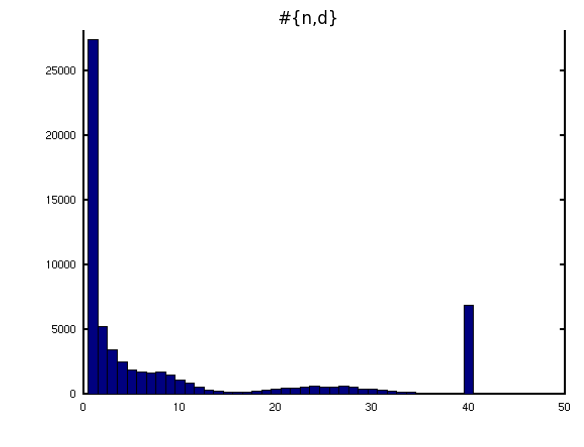

In [31]:
img=mpimg.imread('Graphics\Histogram.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('#{n,d}')
plt.show()

Как видно из графика степенной закон распределения степеней вершин (≈ c / d^2.3) в большей степени соблюдается. Однако имеет место выброс при d~40.

#### Диаметр

Для поиска диаметра использовался скрипт реализации алгоритма Дейкстры для Octave:

In [ ]:
function d = simpleDijkstra(adj,s)

n=length(adj);
d = inf*ones(1,n); % distance s-all nodes
d(s) = 0;    % s-s distance
T = 1:n;    % node set with shortest paths not found yet

while not(isempty(T))
    [dmin,ind] = min(d(T));
    for j=1:length(T)
        if adj(T(ind),T(j))>0 && d(T(j))>d(T(ind))+adj(T(ind),T(j))
            d(T(j))=d(T(ind))+adj(T(ind),T(j));
        end
    end 
    T = setdiff(T,T(ind));
end

In [ ]:
function diam = diameter(adj)

diam=0;
for i=1:size(adj,1)
    d=simpleDijkstra(adj,i);
    diam = max([max(d),diam]);
end

В большинстве случаев граф даже с более низким параметром SCALE не являлся связным, а следовательно его диаметр равнялся бесконечности. 
Это можно обьяснить невысоким параметром edge=16, при сравнительно большом количестве вершин. Как следствие - вероятность быть связаным почти равна 0.

## 1.3 Реализация модели Боллобаша–Риордана 

Для реализации генерации случайного графа модели Боллобаша-Риордана были написаны скрипты bollriord1.m и bollriord2.m:
Был сгенерирован следующий неориентированный граф. N = 4000, M = 10

#### Матрица смежности после 1-го этапа

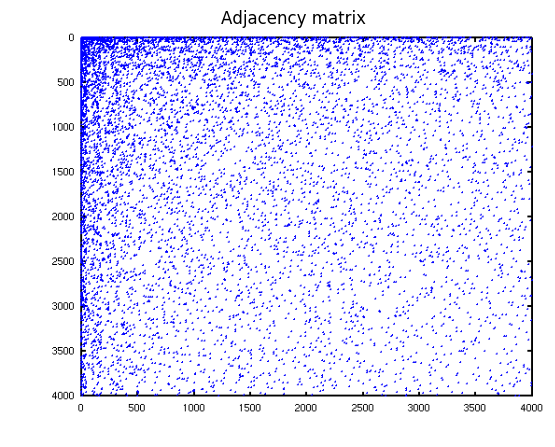

In [26]:
img=mpimg.imread('Graphics\bollriord.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('Adjacency matrix 1')
plt.show()

#### Матрица смежности после 2-го этапа

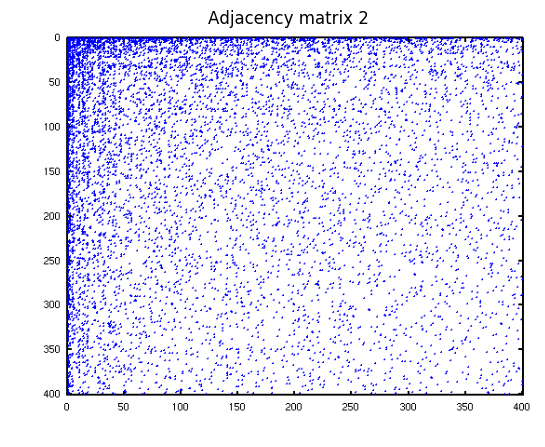

In [27]:
img=mpimg.imread('Graphics\bollriord2.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('Adjacency matrix 2')
plt.show()

Как видно из графиков имеет место большая цитируемость первой вершины v1, поскольку вероятность ее цитируемости изначально в два раза выше, чем вероятность самоцитирования вершины v2 и кумулятивно растет вместе с d. Также можно заметить, что большинство ссылок идет на первые 100-150 сайтов, а остальные 62-70% сайтов слабо между собой связаны.
Диаметр данного графа равен 4 и был найден с помощью вышеупомянтуого алгоритма.

#### Гистограмма #{n,d}

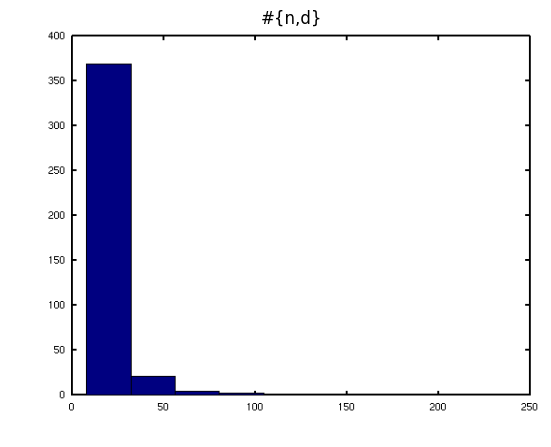

In [29]:
img=mpimg.imread('Graphics\bollriordh.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('#{n,d}')
plt.show()

In [ ]:
Как видно граф по Боллобашу-Риордану довольно сильно отличается от версии сгенерированной по Кронекеру.
Чем более цитируем сайт предшественник, тем выше вероятность быть процитированным новым сайтом.